### Student ID: 18195067
### Student Name: Abhijit Sinha

# Task 3 (CE6002) : Linear classification

*Create your own implementation of linear classification to perform a classification of the dataset provided in the Etivity3_LinearClassification.ipynb notebook without adding extra features to those provided. Use normal linear regression with sign(wTx) to obtain a classification.*

*Observe your results and explain why these results seem disappointing (record your thoughts in a Markdown cell in your notebook).*

---------------------------------
*Now choose suitable new features and use these in your linear classification algorithm to improve the classification performance. Observe and explain (use plots where appropriate) why the classification performance has improved. Try a few different ones and note the differences!*

*Also, use scikit-learn’s Logistic Regression algorithm and compare the performance with your algorithm. It is useful to spend some time thinking about the difference in approach taken in Logistic Regression.*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

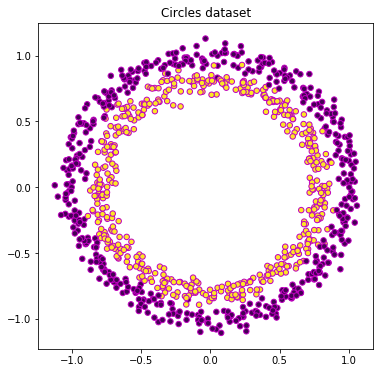

In [3]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, marker='o', s=30, edgecolors='m')
plt.title("Circles dataset")
plt.show()

In [4]:
X.shape

(1000, 2)

### Linear Classification Implementation 
- Matrix X and vector y with bias term of x0=1
- Calculate the pseudo inverse for matrix X using "np.linalg.pinv"
- Get the weights w = [inv(trans(X) * X ) * trans(X)] * y

In [5]:
def get_weights(X, y):
    # Function to find the weight matrix    
    weight_matrix = np.zeros(1 + X.shape[1])
    pseudo_inv_matrix = np.linalg.pinv(X)
    weight_matrix = pseudo_inv_matrix.dot(y)
    return weight_matrix


def y_hat(X, weight_matrix):
    # Function to calculate the y_hat
    return (np.dot(X, np.transpose(weight_matrix)))


def calc_error(actual, predicted):
    # Function to calculate the classification error
    errors = 0
    for x,y in zip(predicted, actual):
        if (x !=y):
            errors+=1
    return errors / len(predicted)


def predict_class(X, weight_matrix):
    # Function to predict the classification label for the input data X
    return np.sign(y_hat(X, weight_matrix))


# Thanks Michel for the help here
def point_on_decision_boundary(x, weights):
    # Fucntion to find the y-pos on the boundary based on x-pos
    return -(weights[0] + weights[1]*x) / weights[2]


def plot_classifier(X, Y, weights):
    # Function to plot the decision boundary
    
    # plot the data samples
    plt.scatter(X[:,1],X[:,2], c=Y, marker='o', s=30, edgecolors='m', label='samples')
    
    # Getting the X and Y position for the classification boundary
    x_min, x_max = X.min(), X.max()
    X_pos = [x_min, x_max]
    Y_pos = [point_on_decision_boundary(x_min, weights), point_on_decision_boundary(x_max, weights)]
    
    # Plot the decision boundary
    plt.plot(X_pos, Y_pos, 'bx-.', label='descision boundary')
    plt.legend(loc='best')
    

In [6]:
def linear_classification(X, y, title=""):
    # Function to calulate the weights and plot the classification boundary
    
    # Insert bias to the input data X; x_0=1
    X = np.insert(X, 0, 1, axis=1)
    
    # Split data in train and test set with 20% samples as test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=y, random_state=42)

    # Get the weights for linear classifier from the train data
    weights = get_weights(X_train, y_train)

    # Calculate the classificaion error
    y_hat = predict_class(X_test, weights)
    error = calc_error(y_test, y_hat)
    print('Classfication error for test data:{:.4f}'.format(error))
    print('Classfication Score for test data:{:.4f}'.format(1-error))

    
    # Create figure for plotting
    plt.figure(figsize=(16, 7))
    
    # Descision boundary for train data
    plt.subplot(1,2,1)
    plt.title('Linear Classfication: Train data '+title)  
    plot_classifier(X_train, y_train, weights)
    
    # Descision boundary for test data
    plt.subplot(1,2,2)
    plt.title('Linear Classfication: Test data '+title)  
    plot_classifier(X_test, y_test, weights)


Classfication error for test data:0.5150
Classfication Score for test data:0.4850


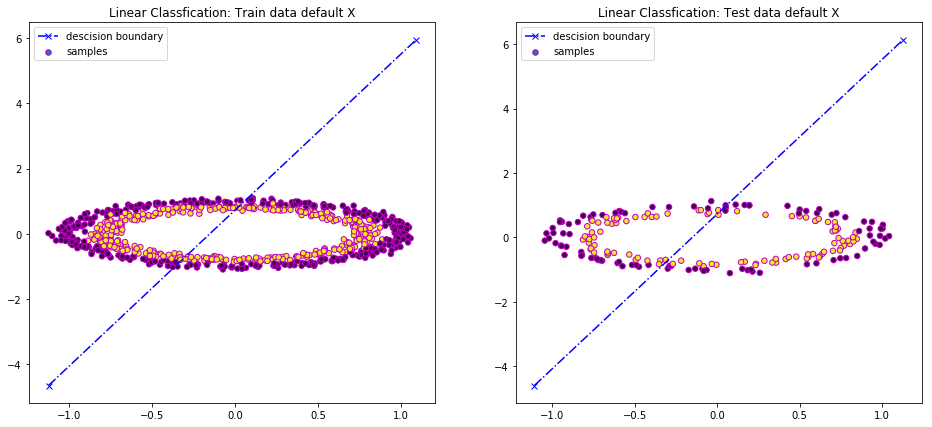

In [7]:
# Run the classification on Original data
linear_classification(X, y, title="default X")

### B. Observation on results:

The Eout is very high (0.59) for the in house linear classification with the default X data. 

The results are disappointing as the **dataset is not linearly separable** due to which the **linear classification algorithm is not able to split to data properly.** 

We can see from the plot that in this case almost 50% of data has a chance of being misclassified and leads to a high classification error.

To improve the Linear Classification, I will transform the data so that it can be linearly separable and then apply the linear classification in Z space.

### C. Choose suitable new features and use these in your linear classification algorithm to improve the classification performance. Observe and explain (use plots where appropriate) why the classification performance has improved
    - Try a few different ones and note the differences! (Z=[1,X1,X2,X1_sq, X2_sq])

References on non-linear transformation: 
1. https://people.revoledu.com/kardi/tutorial/Regression/nonlinear/NonLinearTransformation.htm
2. https://towardsdatascience.com/machine-learning-with-python-easy-and-robust-method-to-fit-nonlinear-data-19e8a1ddbd49

#### 1. Square Transformation on the data
Lets do some non-linear transformation on the data feature and move from X space to Z space and then apply the Linear classification algorithm.

Classfication error for test data:0.0350
Classfication Score for test data:0.9650


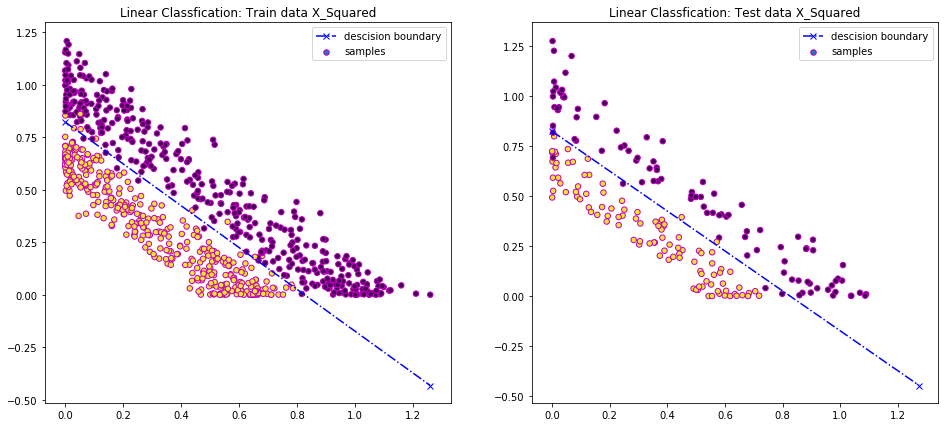

In [8]:
# Square the X data
X_square = np.square(X)

linear_classification(X_square, y, title="X_Squared")

### Observation of "Square" feature transformation on the classification:
After we apply the square transformation on the original data (non-linearly separable), the **new feature space is linearly separable.**

The **linear classification algorithm gives a low Eout of 0.035 on the linearly separable data in Z space**

This is a much better score, **however we cannot 'guarantee' that this will generalise well as we have broken the VC bound by data snooping**. I will complete some more transformations now to compare.

#### 2. Cube Transformation of data

Classfication error for test data:0.5500
Classfication Score for test data:0.4500


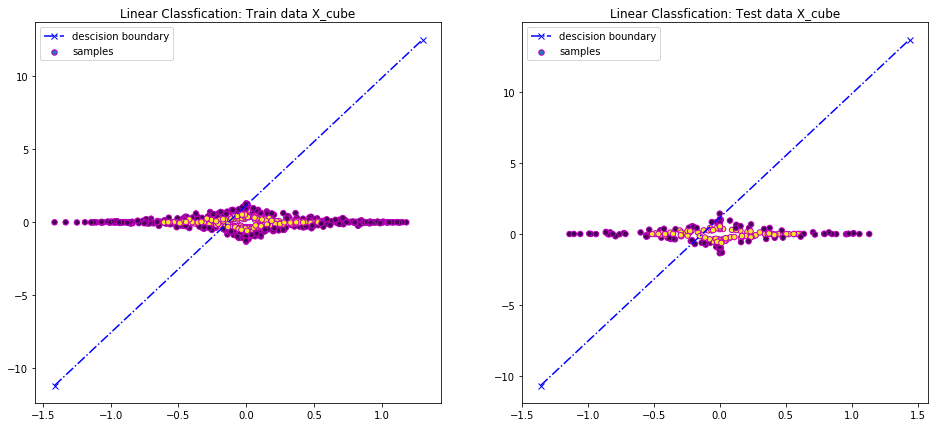

In [9]:
# Cube the X data
X_cube = np.power(X, 3)
linear_classification(X_cube, y, title="X_cube")

The error is very high (Eout=0.685) if we use the cubic transformation on the data and leads to bad classification performance

### Trigonometric Transformations on the data

#### 3. Cosine Transformation of data

Classfication error for test data:0.0350
Classfication Score for test data:0.9650


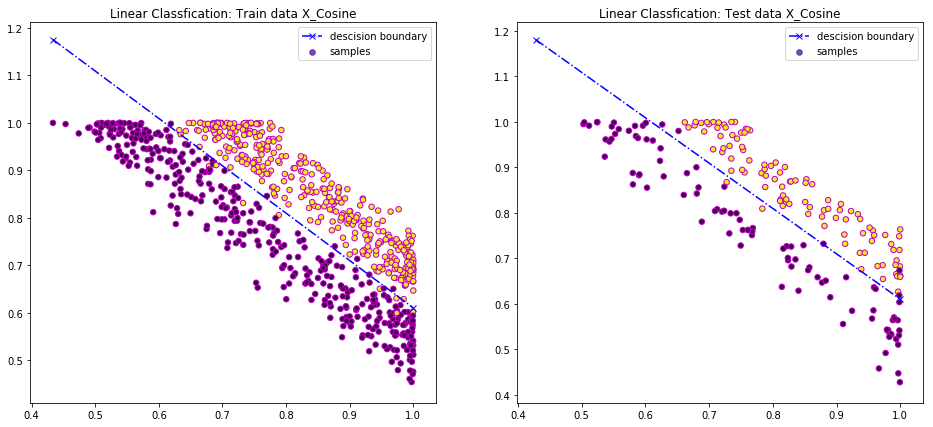

In [10]:
# Cosine the X data
X_cos = np.cos(X)
linear_classification(X_cos, y, title="X_Cosine")

The error is low (Eout=0.035) if we use the cosine transformation and give equivalent results of square transformed data. This is probably because we are using data with circle pattern. I know that I am guilty of data snooping here!

#### 4. Sine Transformation of data

Classfication error for test data:0.5100
Classfication Score for test data:0.4900


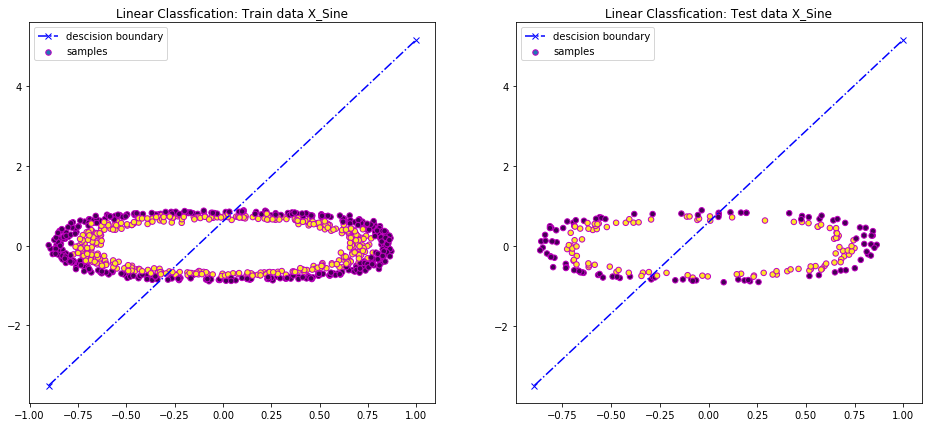

In [11]:
# Sine the X data
X_sin = np.sin(X)
weights = linear_classification(X_sin, y, title="X_Sine")

The error is very high (Eout=0.56) if we use the sine transformation on the data and leads to bad classification performance

#### 5. Tan Transformation of data

Classfication error for test data:0.5300
Classfication Score for test data:0.4700


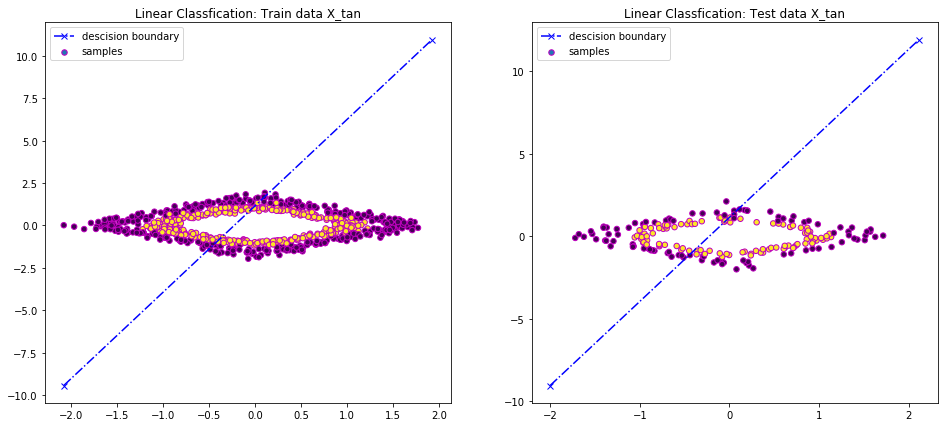

In [12]:
# Tanget on the X data
X_tan = np.tan(X)
weights = linear_classification(X_tan, y, title="X_tan")

The error is high (Eout=0.6) if we use the tan transformation on the data and leads to bad classification performance

### Observation and Summary:

After the bad classification results from original X space (with X data), I went ahead with non-linear transformation on the data to perform classification in Z space.

The Square and Cosine transformation on the data gives a very good classification performance. The cubic transformation and sine, tan trigonometric transform doesn't give better results.

##### Note: In this case we have looked at the data which was a circle and hence squaring method was used to improve the classification error, this may lead to data snooping and makes the VC generalization bound invalid

### D. Use scikit-learn’s Logistic Regression algorithm and compare the performance with your algorithm
- Think about the difference in approach taken in Logistic Regression

## Scikit-Learn Logistic Regression

Reference: https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

In [13]:
def plot_logistic_regression(X, y, title=''):
    
    # Split data in train and test set with 20% samples as test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=y, random_state=42)

    log_reg = LogisticRegression(solver='lbfgs')
    log_reg.fit(X_train, y_train)
    
    y_pred=log_reg.predict(X_test)
    test_score = log_reg.score(X_test, y_test)
    
    # Plot the decision boundary and assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
    # Print the classification score on test data
    plt.text(xx.max()-.1, yy.min()+.3, ('Score=%.2f' %test_score), size=15, horizontalalignment='right')
    
    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()
    
    return test_score, log_reg


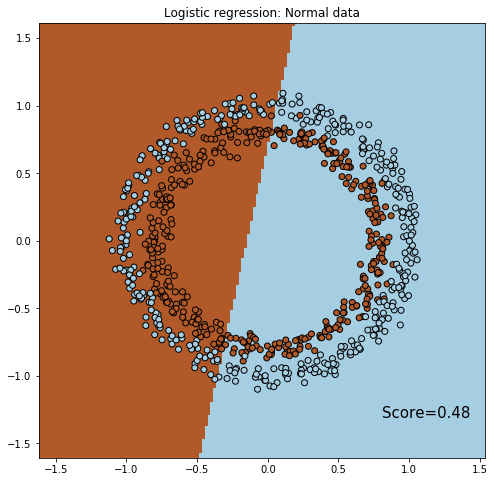

Logistic regression: Mean accuracy score on Raw Test data = 0.485


In [14]:
# Logistic regression on Original data
raw_test_score, clf = plot_logistic_regression(X, y, title="Logistic regression: Normal data")
print("Logistic regression: Mean accuracy score on Raw Test data =", raw_test_score)


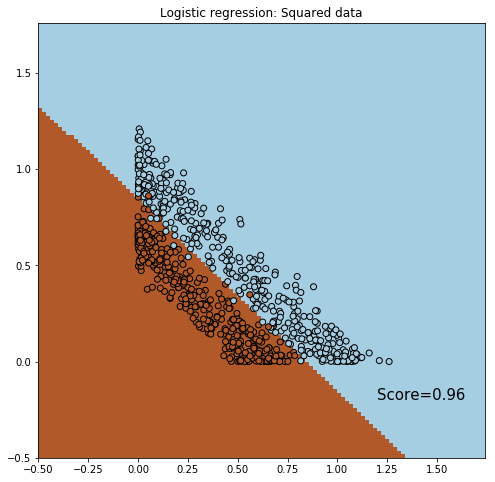

Logistic regression: Mean accuracy score on Squared transformed Test data = 0.965


In [15]:
# Logistic regression on Squared data
squared_test_score, clf  = plot_logistic_regression(X_square, y, title="Logistic regression: Squared data")
print("Logistic regression: Mean accuracy score on Squared transformed Test data =", squared_test_score)


### Observations:
Logistic regression uses a probabilistic function for classification.
We can see significant improvement in classification performance while using the square transformed data in logistic regression classification.

The classification score on the linear regression and logistic regression match very well in the X space and Z space(with square transformed data) 